# Plotting

## Simple `sympy` plotting

In [73]:
# Setup
from sympy import plot, Symbol
from sympy.plotting import plot3d, plot_parametric, plot3d_parametric_line

### A line on a cartesian plane

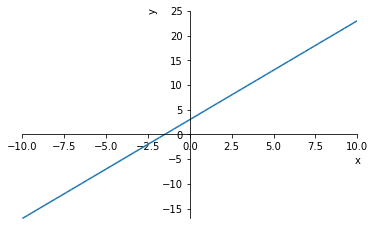

In [89]:
# Make the line
x = Symbol('x')   # Independent variable, x.
y = 2*x+3

# You may have to evaluate (hit Shift+Enter) this cell twice to make the plot pop-up.
plot(y, xlabel="x", ylabel="y")

## The Folium of Descartes
A famous graph. 

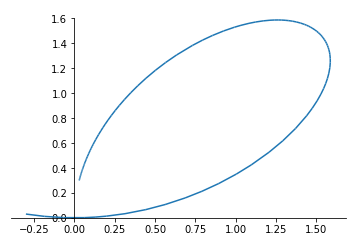

In [86]:
plot_parametric(3*t/(1+t**3),3*t**2/(1+t**3), (t, -0.1,10))

### A plane on a 3D coordinate system

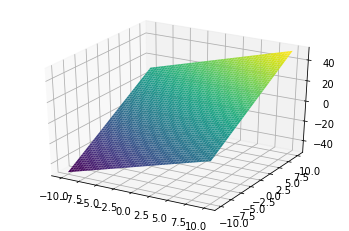

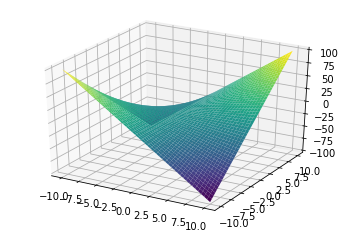

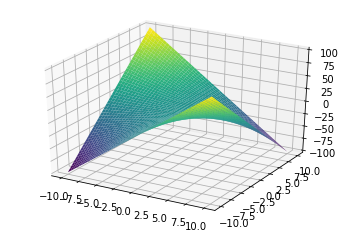

In [43]:
# Make 'y' a variable as well.
y = Symbol('y')

# Plot the plane(s), but don't make them show yet. Also, remove their axes.
p = plot3d(2*x+3*y)
plot3d(x*y)
plot3d(-x*y)

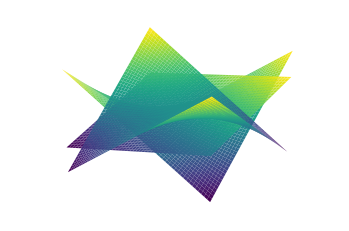

In [39]:
# Make the plane
y = Symbol('y')

# Plot the plane(s), but don't make them show yet. Also, remove their axes for visual appeal.
p1 = plot3d(2*x+3*y,  show=False, axis=False)   
p2 = plot3d(-x*y,     show=False, axis=False)
p3 = plot3d(x*y,      show=False, axis=False)

# Add visual contents of p2 and p3 to p1 -- essentially plots them on the same figure.
p1.append(p2[0])
p1.append(p3[0])

# Make p1 appear.
p1.show()

### A line in 3D space

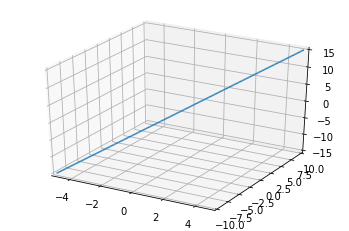

In [87]:
t = Symbol('t')

p1 = plot3d_parametric_line(1*t, 2*t, 3*t, (t, -5, 5))

### Limitations of `sympy` plotting

The `sympy` plotting utilities are written on top of the `matplotlib` utilities. Simple plots like these are useful for functions that we are mildly familiar with, but are not the best approach, because:

* `sympy` abstracts away how points are formed and plotted -- a feature that is useful for speed, but will inhibit you from working with any real significant data. 
* Shelter the user from the use of advanced tools available to us from `matplotlib` -- animations, vector-field plots, qualitative/descriptive visualisations.



## More elaborate `matplotlib` plotting

We will use `numpy` to create our points and `matplotlib` to place those points on graphs in (hopefully) a meaningful way.

### A line on a cartesian plane

### A plane on a 3D coordinate system

### A line in 3D space

# -------- Questions --------

## Question 1:



## Answer 1:


## Question 2:



## Answer 2:

## Question 3:



## Answer 3:

## Question $n$:



## Answer $n$: